<a href="https://colab.research.google.com/github/rladbstj56/2024PythonDataAnalysis/blob/main/241008%EA%B3%BC%EC%A0%9C1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 파일 주소 : /content/drive/MyDrive/pythondataanalysis/과제1/hw1_data.csv

In [15]:
import pandas as pd
import numpy as np

# 교수님이 올려주신 encoding 방법 한번 찾아보기
# 한글 있을때 처리법
# df = pd.read_csv('/content/drive/MyDrive/pythondataanalysis/과제1/hw1_data.csv', encoding='ISO-8859-1')
df = pd.read_csv('/content/drive/MyDrive/pythondataanalysis/과제1/hw1_data.csv', encoding='cp949')


# 1. 데이터프레임 상위 10 개와 하위 1 개를 출력하고 각 열의 자료형을 출력하시오

print("상위 10개\n",df.head(10),"\n")

print("하위 1개\n",df.tail(1),"\n")

print(df.info()) # 각 열의 자료형


상위 10개
    Rank                      Name Net Worth Age        Country  \
0     1                 Elon Musk    $219 B  50  United States   
1     2                Jeff Bezos    $171 B  58  United States   
2     3  Bernard Arnault & family    $158 B  73         France   
3     4                Bill Gates    $129 B  66  United States   
4     5            Warren Buffett    $118 B  91  United States   
5     6                Larry Page    $111 B  49  United States   
6     7               Sergey Brin    $107 B  48  United States   
7     8             Larry Ellison    $106 B  77  United States   
8     9             Steve Ballmer   $91.4 B  66  United States   
9    10             Mukesh Ambani   $90.7 B  64          India   

               Source               Industry  
0       Tesla, SpaceX             Automotive  
1              Amazon             Technology  
2                LVMH       Fashion & Retail  
3           Microsoft             Technology  
4  Berkshire Hathaway  Finance

In [16]:
# 2. 데이터셋의 결측치를 출력한 후 해당 행을 제거하시오.


print(pd.isna(df)) # 결측치 출력
pd.isna(df).sum() # 결측치 몇개인지 확인

       Rank   Name  Net Worth    Age  Country  Source  Industry
0     False  False      False  False    False   False     False
1     False  False      False  False    False   False     False
2     False  False      False  False    False   False     False
3     False  False      False  False    False   False     False
4     False  False      False  False    False   False     False
...     ...    ...        ...    ...      ...     ...       ...
2504  False  False      False  False    False   False     False
2505  False  False      False  False    False   False     False
2506  False  False      False  False    False   False     False
2507  False  False      False  False    False   False     False
2508  False  False      False  False    False   False     False

[2509 rows x 7 columns]


,0
Rank,0
Name,0
Net Worth,0
Age,74
Country,0
Source,0
Industry,1


In [17]:
df = df.dropna(subset=['Age','Industry'])
pd.isna(df).sum()

,0
Rank,0
Name,0
Net Worth,0
Age,0
Country,0
Source,0
Industry,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2434 entries, 0 to 2508
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rank       2434 non-null   int64 
 1   Name       2434 non-null   object
 2   Net Worth  2434 non-null   object
 3   Age        2434 non-null   object
 4   Country    2434 non-null   object
 5   Source     2434 non-null   object
 6   Industry   2434 non-null   object
dtypes: int64(1), object(6)
memory usage: 152.1+ KB


In [19]:
# 3. ‘Net worth’ 열의 데이터를 다음과 같이 정규화한 후 숫자로 자료형을 변환한 후 출력하시오.
# ($219 B → 219)

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2434 entries, 0 to 2508
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rank       2434 non-null   int64 
 1   Name       2434 non-null   object
 2   Net Worth  2434 non-null   object
 3   Age        2434 non-null   object
 4   Country    2434 non-null   object
 5   Source     2434 non-null   object
 6   Industry   2434 non-null   object
dtypes: int64(1), object(6)
memory usage: 152.1+ KB


In [20]:
import re # re 모듈을 사용하기 위해 import

# 숫자 외의 문자나 특수기호를 클렌징하는 함수
def cleansing(text):
  # re.sub(pattern,replacement,string)
  # pattern : 정규식을 사용하여 $ 또는 B 문자를 찾는 패턴
  # replacement : 빈 문자열 '' 을 넣어서 앞의 패턴을 삭제
  # string : $와 B의 삭제가 필요한 원본 문자열
  return re.sub(r'\$|B','',text)


# apply 를 사용하여 데이터프레임의 특정 열에 클렌징 적용
df['Net Worth'] = df['Net Worth'].apply(cleansing)

# 특정 열을 float형으로 바로 변환
df['Net Worth'] = df['Net Worth'].astype(float)

print(df)

df.info()


      Rank                          Name  Net Worth Age        Country  \
0        1                     Elon Musk      219.0  50  United States   
1        2                    Jeff Bezos      171.0  58  United States   
2        3      Bernard Arnault & family      158.0  73         France   
3        4                    Bill Gates      129.0  66  United States   
4        5                Warren Buffett      118.0  91  United States   
...    ...                           ...        ...  ..            ...   
2504  2505                  Guo Jiangang        1.0  55          China   
2505  2506  Vera Rechulski Santo Domingo        1.0  73         Brazil   
2506  2507                  Mike Speiser        1.0  51  United States   
2507  2508                   Yao Liangbo        1.0  53          China   
2508  2509              Ihor Kolomoyskyy        1.0  59        Ukraine   

                    Source               Industry  
0            Tesla, SpaceX             Automotive  
1      

In [21]:
# 4. 다음 열의 고유값을 출력하시오. (‘country’, ‘industry’)

print(df['Country'].unique(),"\n")
print(df['Industry'].unique())

['United States' 'France' 'India' 'China' 'Canada' 'Spain' 'Hong Kong'
 'Germany' 'Italy' 'Mexico' 'Australia' 'Austria' 'Japan' 'Indonesia'
 'Switzerland' 'Chile' 'Russia' 'Singapore' 'Sweden' 'Czechia'
 'United Kingdom' 'Brazil' 'Netherlands' 'United Arab Emirates' 'Ireland'
 'Nigeria' 'Denmark' 'Thailand' 'Cyprus' 'Taiwan' 'Malaysia' 'Israel'
 'Monaco' 'Colombia' 'New Zealand' 'South Korea' 'Belgium' 'South Africa'
 'Philippines' 'Egypt' 'Greece' 'Norway' 'Poland' 'Eswatini (Swaziland)'
 'Peru' 'Algeria' 'Kazakhstan' 'Georgia' 'Turkey' 'Portugal' 'Finland'
 'Ukraine' 'Belize' 'Venezuela' 'Vietnam' 'Lebanon' 'Romania' 'Argentina'
 'Guernsey' 'Oman' 'Iceland' 'Liechtenstein' 'Qatar' 'Bulgaria' 'Morocco'
 'Macau' 'Barbados' 'Slovakia' 'St. Kitts and Nevis' 'Tanzania' 'Uruguay'
 'Nepal' 'Hungary' 'Estonia'] 

['Automotive' 'Technology' 'Fashion & Retail' 'Finance & Investments'
 'Diversified' 'Media & Entertainment' 'Food & Beverage' 'Logistics'
 'Real Estate' 'Metals & Mining' 'Manufac

In [22]:
# 5. ‘Net worth’ 열의 상위 1000 개 행에 대한 평균과 중간값을 구하시오.


# 범위 내의 데이터 선택
filtered = df['Net Worth'][0:1000] # 0번째 인덱스부터 999 인덱스까지

NW_mean = filtered.mean()
NW_median = filtered.median()

print(NW_mean)
print(NW_median)


9.301150000000002
5.1


In [23]:
# 6. ‘Age’ 열의 중간값을 구하시오. (전체 행)

# 중간값 구하려면 먼저 데이터형을 int형으로 전환해야함
df['Age'] = df['Age'].astype(int)

age_median = df['Age'].median()
print(age_median)

64.0


In [24]:
# 7. ‘Country’ 과 ‘source’ 열의 빈도수를 각각 구하시오.

cnt_country = df['Country'].value_counts()
cnt_source = df['Source'].value_counts()

print(cnt_country,'\n')
print(cnt_source)

Country
United States           686
China                   486
India                   153
Germany                 103
Russia                   74
                       ... 
Venezuela                 1
Belize                    1
Portugal                  1
Eswatini (Swaziland)      1
Estonia                   1
Name: count, Length: 74, dtype: int64 

Source
real estate           137
pharmaceuticals        86
investments            86
diversified            79
software               65
                     ... 
hair care products      1
winter jackets          1
Formula One             1
media, tech             1
pharma retailing        1
Name: count, Length: 851, dtype: int64


In [25]:
# 8. ‘Age’ 열의 히스토그램을 그리시오.

import matplotlib.pyplot as plt

df.describe() # 최소 최대값 확인


,Rank,Net Worth,Age
count,2434.000000,2434.000000,2434.000000
mean,1248.217338,4.827383,64.317173
std,725.231576,10.823729,13.360184
min,1.000000,1.000000,19.000000
25%,619.250000,1.500000,55.000000
50%,1248.500000,2.400000,64.000000
75%,1872.750000,4.400000,74.000000
max,2509.000000,219.000000,100.000000


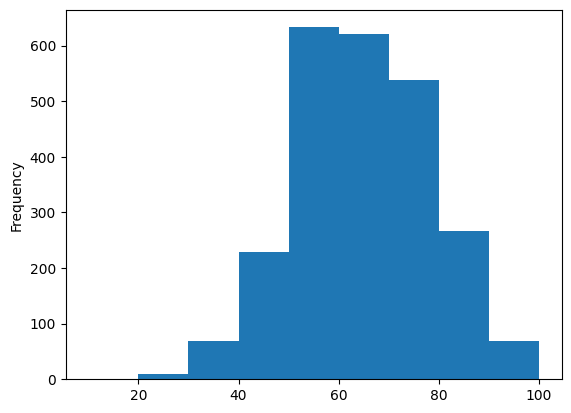

In [26]:
df['Age'].plot(kind='hist',bins=[10,20,30,40,50,60,70,80,90,100])
plt.show()

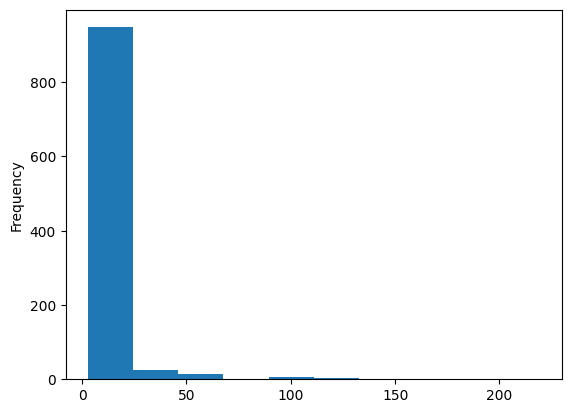

In [27]:
# 9. ‘Net worth’ 열에서 상위 1000 개 행의 히스토그램을 그리시오.

df['Net Worth'][0:1000].plot(kind='hist')
plt.show()

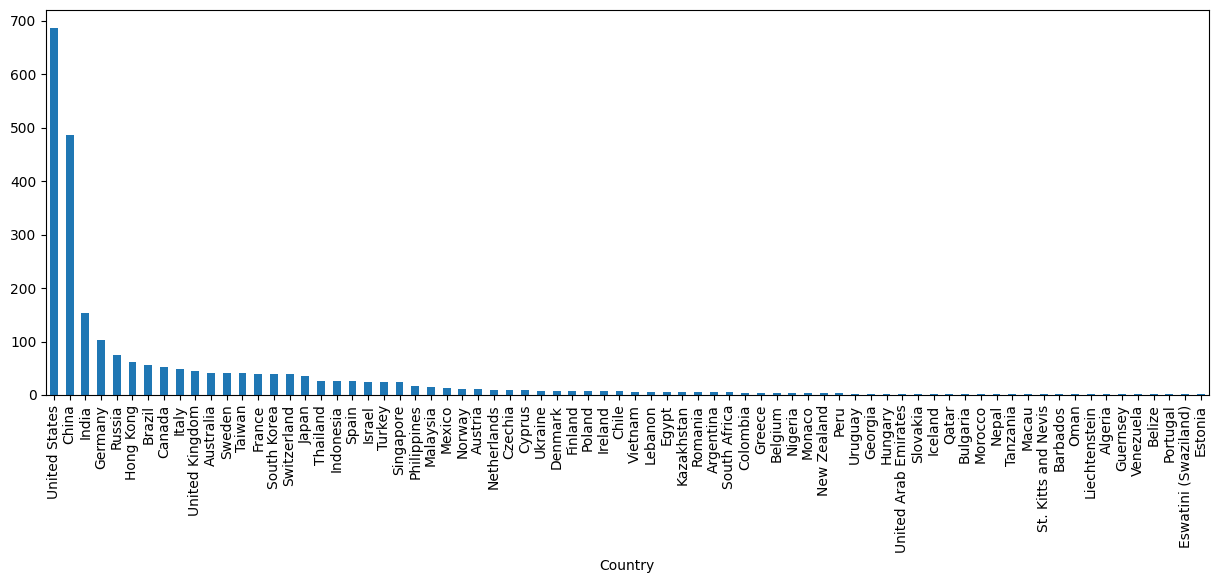

In [41]:
# 10. 국가명 히스토그램을 그리시오. (x 축: 국가명, y 축: 국가 빈도수)

df['Country'].value_counts().plot(kind='bar', figsize = (15,5)) # 데이터가 너무 많아서 figure size 조정
plt.show()